Name: Nancy, Ritta, Harsh

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from random import seed
from random import random
from math import exp

## Problem 1
### 1.1

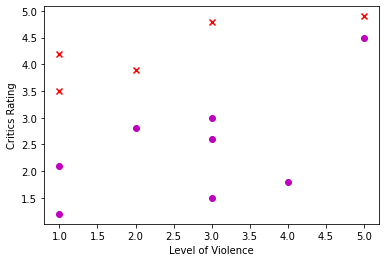

In [2]:
da = pd.read_csv('movieData.csv')
X = np.c_[np.ones(len(da)), da.iloc[:, :2]]
y = np.array(da.Watched)

# print the original graph
plt.figure()
for index, x in enumerate(X):
    if y[index] == -1:
        plt.scatter(x[1], x[2], c='m', marker='o')
    else:
        plt.scatter(x[1], x[2], c='r', marker='x')

plt.xlabel('Level of Violence')
plt.ylabel('Critics Rating')
plt.show()

In [3]:
def sign_function(z):
    return -1 if (z < 0) else 1

W = np.zeros(3)

dis = 0
interation = 1
for i in range(1000):
    for idx, x_i in enumerate(X):
        if sign_function(x_i@W) != y[idx]:# or dis>3:
            W_new = W + y[idx]*x_i
            dis = math.dist(W_new, W)
            W = W_new
            interation += 1
            break
print(W, interation)

[-11.   -5.    7.4] 42


### 1.2

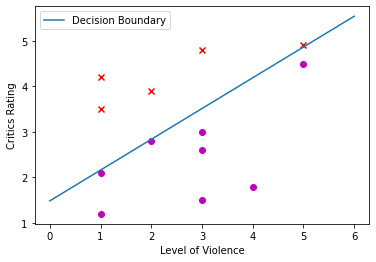

In [4]:
x1 = [0, 6]
x2 = []
for i_x1 in x1:
    i_x2 =(-W[0] - W[1] * i_x1)/W[2]
    x2.append(i_x2)

plt.figure()
# plt.plot(dots[:,0], dots[:,1], label='Decision Boundary')
plt.plot(x1, x2, label='Decision Boundary')
for index, x in enumerate(X):
    if y[index] == -1:
        plt.scatter(x[1],x[2], c='m', marker='o')
    else:
        plt.scatter(x[1],x[2], c='r', marker='x')

plt.legend(loc = 'best')
plt.xlabel('Level of Violence')
plt.ylabel('Critics Rating')
plt.show()

## Problem 2

### 2.1

In [5]:
da2 = np.array(pd.read_csv('siCoData.csv'))
X = da2[:,0].reshape(-1,1) # inputs
y = da2[:,1].reshape(-1,1) # outputs, making this a column vector

In [16]:
d = 1 # num of feature
neuron_threshold = (len(X)/10-1)/(d+2) # calculate the number of neuron in the hidden layer to be used according to N > 10w
neuron_threshold

8.0

In [6]:
# activation for the 1st layer
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [7]:
def three_layer_back_propagation(W1, W2, pred, target, hidden_nodes_val, input_nodes_val, lr):

    dw_l1_1h = 2 * (pred - target) * W2 * ((1-np.insert(tanh(hidden_nodes_val[1:]) ** 2, 0, 1)).reshape(-1,1)) # linear problem, so derivative start with S instead of theta(S)
    dw_l1 = np.outer(input_nodes_val, dw_l1_1h[1:]) # matrix multiply
    W1_new = W1 - lr * dw_l1 # update weight

    dw_l2 = 2 * (pred - target) * (np.insert(tanh(hidden_nodes_val[1:]), 0, 1).reshape(-1,1)) # linear problem, so derivative start with S instead of theta(S)
    W2_new = W2 - lr * dw_l2  # update weight
    return W1_new, W2_new

In [8]:
def my_three_layer_SGD_BP(X, W1, W2, learning_rate, error_threshold, max_iteration): # X not include "1" column

    lr = learning_rate
    error_track = []
    Weights = []
    E_in = error_threshold+1 # initial E_in

    input_layer_outputs = np.c_[np.ones(X.shape[0]),X]

    for i in range(max_iteration):

        for n in range(len(X)):
            # forward phase
            hidden_layer_outputs = np.c_[np.ones(X.shape[0]), tanh(np.dot(input_layer_outputs, W1))]
            output_layer_outputs = np.dot(hidden_layer_outputs, W2) # calculate the pred value

            E_in = np.average((output_layer_outputs - y) **2) # Average error of all dps
            error_track.append(E_in)
            Weights.append([W1,W2])

            # update weights with self defined bp function
            W1, W2 = three_layer_back_propagation(W1, W2, output_layer_outputs[n], y[n], hidden_layer_outputs[n], input_layer_outputs[n], lr)

            if E_in <= error_threshold:
                break

        if E_in <= error_threshold:
            break

    return error_track, Weights

In [9]:
# choose a random seed for reproducible results
np.random.seed(18)

errors =[]
weights = []
for j_nodes in range(1, 9): # try different number of neuron in hidden layer
    # number of nodes in the hidden layer
    node_num_hidden = j_nodes # not include bias
    W1 = 2*np.random.random((X.shape[1] + 1, node_num_hidden)) - 1
    W2 = 2*np.random.random((node_num_hidden + 1, y.shape[1])) - 1

    train = my_three_layer_SGD_BP(X, W1, W2, 0.1, 0.02, 50)
    # min_Ein_by_hidden_nodes.append([j_nodes] + list(train[:2]))
    # res.append(train)
    errors.extend(train[0])
    weights.extend(train[1])

In [10]:
idx = np.argmin(np.array(errors)) # search the min idx
min_Ein = np.array(errors)[idx]
min_Ein

0.01903038364349462

In [11]:
w_select = weights[idx]
W1_select = w_select[0]
W2_select = w_select[1]
print('Minimal Ein: ', min_Ein, '\nnum_of_iterations: ', idx, '\n\nWeight\n1st layer:\n', W1_select, '\n\n2nd layer\n', W2_select)

Minimal Ein:  0.01903038364349462 
num_of_iterations:  27527 

Weight
1st layer:
 [[ 0.04594177  1.1770418  -1.0766707 ]
 [-2.12126988 -1.66813637 -1.5030455 ]] 

2nd layer
 [[-0.04646818]
 [-2.18175827]
 [ 1.28020052]
 [ 1.14250147]]


### 2.2

In [12]:
input_layer_outputs = np.c_[np.ones(X.shape[0]),X]
hidden_layer_outputs = np.c_[np.ones(X.shape[0]), tanh(np.dot(input_layer_outputs, W1_select))]
output_layer_outputs = np.dot(hidden_layer_outputs, W2_select) # cal the pred value with selected weights

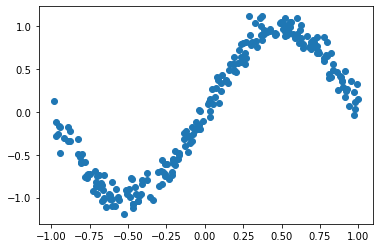

In [13]:
plt.plot(X, y, linestyle='none', marker='o')
plt.show()

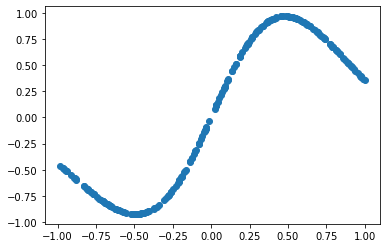

In [14]:
plt.plot(X, output_layer_outputs, linestyle='none', marker='o')
plt.show()